#A - Objective and Overview

## **Objective**

Predict a drafted wide receiver's average fantasy points per game (PPG) in their first three seasons in the NFL*

**point per reception (PPR) style scoring* 

## **Feature Description:**
**DP**: draft pick where player was selected in the NFL draft

**REC_per_GP**: receptions per game

**REC_Yards_per_GP**: receiving yards per game

**REC_TDs_per_GP**: receiving touchdowns per game

**Yards_per_REC**: yards gained per receptions

**Touches_per_GP**: touches per game

**PPR_per_GP**: average fantasy points per game (PPR style scoring) in college

**Combined_REC_MS**: a metric designed to represent a player's receiving production in their college offense

**RecPTMPA**: receptions per team pass attempt

**REC_Yards_per_TM_PA**: receiving yards per team pass attempt

**REC_TDS_per_TM_PA**: receiving touchdowns per team pass attempt

**REC_CD**: represents the player's percentage of their team's offense in respect to the team's yardage and touchdowns

**WR_BOA_20**: the breakout age for wide receivers is defined by their age at the beginning of the college football season when they first posted a Dominator Rating at or above 20% (from playerprofiler.com)

**WR_BOA_30**: the breakout age for wide receivers is defined by their age at the beginning of the college football season when they first posted a Dominator Rating at or above 30% (from playerprofiler.com)

**BMI**: body mass index (BMI) recorded during the NFL Combine. Formula = Mass (lb) / Height (in)^2 x 703

**Hand_Size**: the distance from the tip of the pinky to the tip of the thumb with the fingers spread out (recorded at NFL combine)

**Arm_Length**: the distance from the end of the bicep or shoulder blade to the tip of the middle finger with the arm extended (recorded at NFL combine)

**Power_5_Conference**: indicates whether the player played for a school belonging in one of the 'Power 5 Conferences' (Big 10, Big 12, ACC, SEC, or PAC-12) (0 = No, 1 = Yes)

**Early_Declare**: indicates whether a player declared for the NFL draft before his senior year season (0 = No, 1 = Yes)

## **Target Description:**

**AVG_PPG_YR_1_3**: average fantasy points per game (PPR style scoring) over the first three years of the player's NFL career




## **Recognition:**
Credit to FF_Spaceman for the dataset. Data source: https://www.patreon.com/posts/post-draft-65853161*

*dataset has been updated with WR class of 2022 NFL stats

#B - Setup

##1.0 Import Libraries and Read Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf

from tensorflow import keras
from keras import backend as K

from sklearn.model_selection import GridSearchCV
from math import sqrt

from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
df = pd.read_csv('2022_WR_Database.csv', header = 2)

##2.0 Preview Data

In [ ]:
df.head()

,Player,NFL Player ID,School,Conf,DOB,DR,DP,Draft_Year,Draft_Age,NCAA_Szns,...,40 time.1,Bench.1,Vertical.1,Broad.1,Shuttle.1,3 Cone.1,Top_5_WR,Top_12_WR,Top_24_WR,AVG_PPG_YR_1_3
0,Alec Pierce,NaN,Cincinnati,American,5/2/2000,2,53,2022,22,4,...,-,-,-,-,4.2,-,-,-,-,7.02
1,Bo Melton,NaN,Rutgers,Big Ten,5/18/1999,7,229,2022,23,5,...,-,18,-,-,4.1,6.81,-,-,-,0
2,Braylon Sanders,NaN,Ole Miss,SEC,1/21/1999,UDFA,UDFA,2022,23,5,...,-,12,-,-,4.25,6.96,-,-,-,-
3,Britain Covey,NaN,Utah,Pac-12,3/18/1997,UDFA,UDFA,2022,25,5,...,4.5,-,32,118,4.09,6.73,-,-,-,-
4,Calvin Austin,NaN,Memphis,American,3/24/1999,4,138,2022,23,4,...,-,11,-,-,-,-,-,-,-,0


In [ ]:
df.describe()

,Draft_Year,Draft_Age,NCAA_Szns,18,19,20,21,22,23,18.1,...,Return Yards/GP.3,Return TDs.3,Return TDs/GP.3,Total Touches.2,Total Touches/GP.2,Total Yards.3,Total Yards/GP.3,Total TDs.3,Total TDs/GP.3,REC_CD
count,889.00000,889.000000,889.000000,397.000000,693.000000,785.000000,738.000000,390.000000,87.000000,397.000000,...,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.00000,889.000000,889.000000
mean,2013.48369,22.384702,3.491564,8.267003,9.692641,10.667516,11.177507,10.964103,11.080460,5.221662,...,11.913161,0.204724,0.017126,54.504949,4.873678,770.807424,68.780990,5.39775,0.476415,0.295141
std,5.80230,0.899469,0.775604,3.793834,3.367975,2.928620,2.529003,2.806299,2.417083,18.030312,...,18.810062,0.503076,0.038678,28.582083,2.252367,378.784369,29.466504,3.03944,0.244234,0.116525
min,2003.00000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.100000,0.000000,0.000000,2.500000,0.300000,12.300000,1.900000,0.00000,0.000000,0.000000
25%,2009.00000,22.000000,3.000000,5.000000,8.000000,10.000000,10.000000,10.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,34.700000,3.300000,507.500000,47.400000,3.30000,0.301000,0.220000
50%,2014.00000,22.000000,4.000000,9.000000,11.000000,12.000000,12.000000,12.000000,12.000000,0.000000,...,2.700000,0.000000,0.000000,49.300000,4.400000,709.300000,63.800000,5.00000,0.443000,0.300000
75%,2019.00000,23.000000,4.000000,11.000000,12.000000,13.000000,13.000000,13.000000,13.000000,3.000000,...,16.000000,0.000000,0.019000,69.300000,5.900000,986.300000,86.300000,7.00000,0.608000,0.370000
max,2022.00000,26.000000,6.000000,14.000000,15.000000,16.000000,16.000000,15.000000,14.000000,190.000000,...,143.000000,4.000000,0.308000,224.800000,18.300000,2804.500000,201.100000,20.50000,1.577000,0.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Columns: 611 entries, Player to AVG_PPG_YR_1_3
dtypes: float64(330), int64(66), object(215)
memory usage: 4.1+ MB


##3.0 Data Preprocessing, Cleaning, and Feature Engineering

###3.1 Select Columns of Interest

In [ ]:
draft_df = df[['Player', 
               'Conf',
               'DR', 
               'DP', 
               'Draft_Year', 
               'Draft_Age', 
               'NCAA_Szns',
               #'GP',
               #'REC',
               'REC_per_GP',
               #'REC_Yards',
               'REC_Yards_per_GP',
               #'REC_TDs',
               'REC_TDs_per_GP',
               'Yards_per_REC',
               'Touches_per_GP',
               #'PPR_Points',
               'PPR_per_GP',
               #'PPR_per_Touch',
               #'Total_Touches',
               #'REC_MS',
               #'REC_Yards_MS',
               #'REC_TDs_MS',
               'Combined_REC_MS',
               'RecPTMPA',
               'REC_Yards_per_TM_PA',
               'REC_TDS_per_TM_PA',
               'REC_CD',
               'WR_BOA_20',
               'WR_BOA_30',
               'BMI',
               'Hand_Size',
               'Arm_Length',
               'AVG_PPG_YR_1_3']]


###3.2 Remove Undrafted Free Agents (UDFA) from Dataset

In [ ]:
#Remove undrafted players from dataset
draft_df = draft_df[draft_df.DR != 'UDFA']

###3.3 Replace and Convert Non-numeric Data to Numeric

In [ ]:
#replace '-' with 24, indicating they did not breakout in college (assuming college years age 18-23)
draft_df['WR_BOA_20'] = draft_df['WR_BOA_20'].replace('-',24)
draft_df['WR_BOA_30'] = draft_df['WR_BOA_30'].replace('-',24)

#Replace non-numeric values
draft_df['BMI'] = draft_df['BMI'].replace('-',np.nan);
draft_df['Hand_Size'] = draft_df['Hand_Size'].replace('-',np.nan);
draft_df['Arm_Length'] = draft_df['Arm_Length'].replace('-',np.nan);
draft_df['AVG_PPG_YR_1_3'] = draft_df['AVG_PPG_YR_1_3'].replace('-',0.0);

#convert data types to float
draft_df["DR"] = draft_df.DR.astype(float)
draft_df["DP"] = draft_df.DP.astype(float)
draft_df["WR_BOA_20"] = draft_df.WR_BOA_20.astype(float)
draft_df["WR_BOA_30"] = draft_df.WR_BOA_30.astype(float)
draft_df["BMI"] = draft_df.BMI.astype(float)
draft_df["Hand_Size"] = draft_df.Hand_Size.astype(float)
draft_df["Arm_Length"] = draft_df.Arm_Length.astype(float)
draft_df["AVG_PPG_YR_1_3"] = draft_df.AVG_PPG_YR_1_3.astype(float)

#Replace NaN with median BMI
draft_df['BMI'] = draft_df['BMI'].fillna(draft_df['BMI'].median())
draft_df['Hand_Size'] = draft_df['Hand_Size'].fillna(draft_df['Hand_Size'].median())
draft_df['Arm_Length'] = draft_df['Arm_Length'].fillna(draft_df['Arm_Length'].median())

###3.4 Feature Engineering

In [ ]:
#Create Power 5 Conference column based on college Conference column
draft_df['Power_5_Conference'] = np.nan
draft_df['Power_5_Conference'] = np.where((draft_df.Conf == 'ACC') | (draft_df.Conf == 'Big Ten') | (draft_df.Conf == 'Big 12') | (draft_df.Conf == 'Pac-12') | (draft_df.Conf == 'SEC'),1, 0)

#Create Early Declare column based on # of NCAA Seasons column
draft_df['Early_Declare'] = np.nan
draft_df['Early_Declare'] = np.where((draft_df.NCAA_Szns <= 3),1, 0)

#drop columns
draft_df = draft_df.drop(['Conf','NCAA_Szns'],axis = 1)

In [ ]:
#Move AVG_PPG_YR_1_3 column to end of dataframe
df1 = draft_df.pop('AVG_PPG_YR_1_3')
draft_df['AVG_PPG_YR_1_3']=df1 

In [ ]:
draft_df.head()

,Player,DR,DP,Draft_Year,Draft_Age,REC_per_GP,REC_Yards_per_GP,REC_TDs_per_GP,Yards_per_REC,Touches_per_GP,...,REC_TDS_per_TM_PA,REC_CD,WR_BOA_20,WR_BOA_30,BMI,Hand_Size,Arm_Length,Power_5_Conference,Early_Declare,AVG_PPG_YR_1_3
0,Alec Pierce,2.0,53.0,2022,22,2.9,51.4,0.361,17.5,2.9,...,0.009,0.27,21.0,24.0,26.29,9.00,33.00,0,0,7.02
1,Bo Melton,7.0,229.0,2022,23,3.6,44.7,0.244,12.3,4.2,...,0.007,0.35,20.0,21.0,27.12,9.00,31.25,1,0,0.00
4,Calvin Austin,4.0,138.0,2022,23,4.3,70.6,0.611,16.3,4.6,...,0.013,0.33,21.0,21.0,26.04,9.25,30.00,0,0,0.00
8,Chris Olave,1.0,11.0,2022,22,4.6,71.1,0.921,15.4,4.7,...,0.023,0.28,19.0,20.0,25.10,9.50,31.13,1,0,13.48
9,Christian Watson,2.0,34.0,2022,23,2.0,41.2,0.269,20.4,3.0,...,0.013,0.35,20.0,22.0,25.24,10.13,32.50,0,0,11.72


#C - Exploratory Data Analysis (EDA)

[Text(0.5, 1.0, 'Average PPG by Draft Round')]

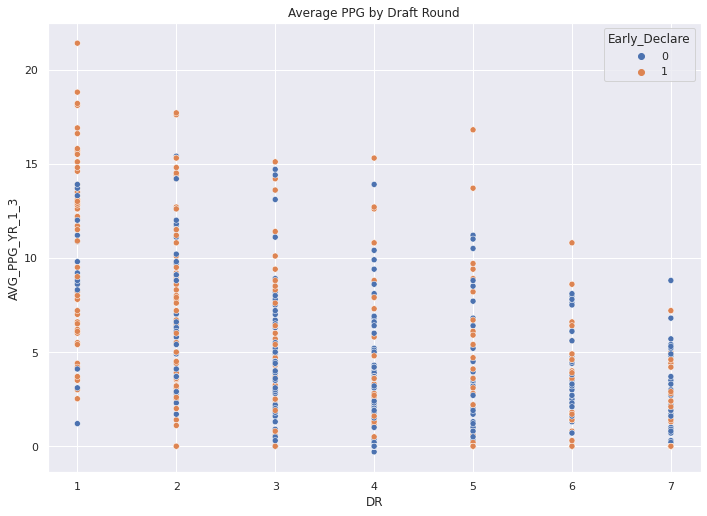

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.scatterplot(data=draft_df, x='DR', y="AVG_PPG_YR_1_3", hue = 'Early_Declare').set(title = 'Average PPG by Draft Round')

[Text(0.5, 1.0, 'Average PPG by Draft Round')]

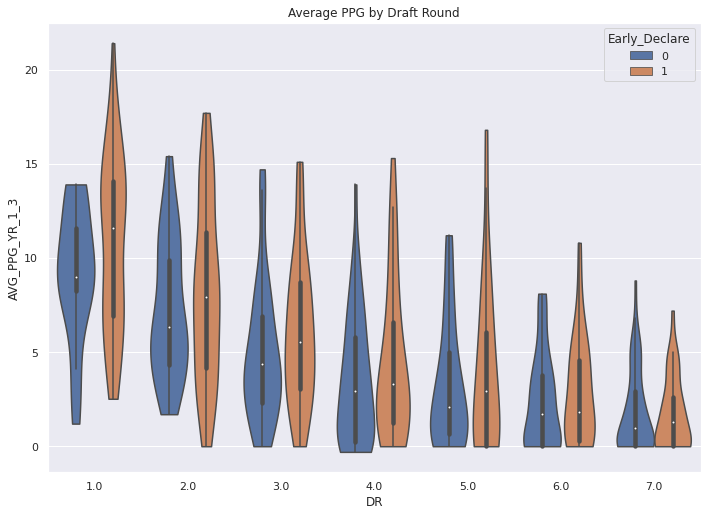

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.violinplot(data=draft_df, x='DR', y="AVG_PPG_YR_1_3", hue = 'Early_Declare', cut=0).set(title = 'Average PPG by Draft Round')

[Text(0.5, 1.0, 'Average PPG by Draft Pick')]

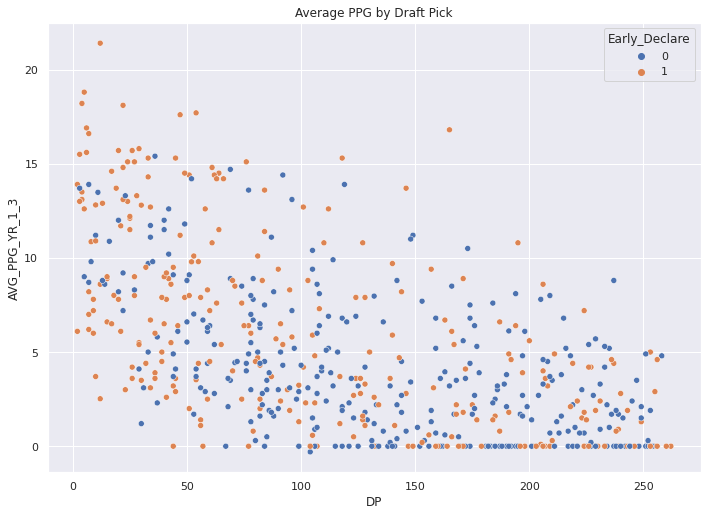

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.scatterplot(data=draft_df, x='DP', y="AVG_PPG_YR_1_3", hue='Early_Declare').set(title = 'Average PPG by Draft Pick')

[Text(0.5, 1.0, 'Average PPG by Age in Draft Year')]

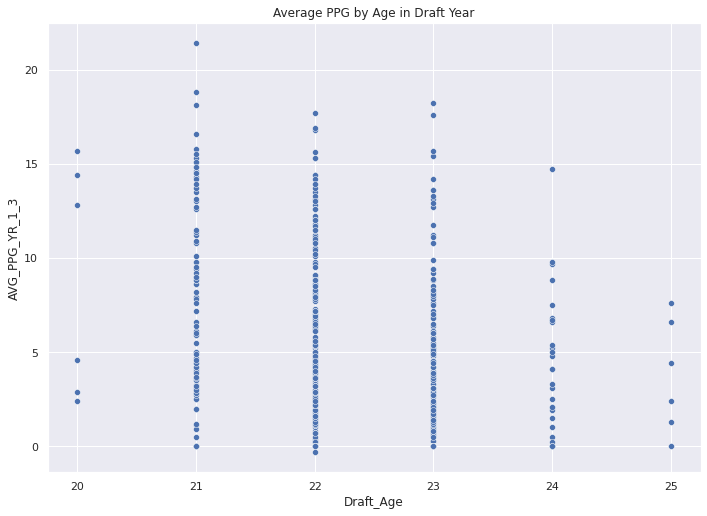

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.scatterplot(data=draft_df, x='Draft_Age', y="AVG_PPG_YR_1_3").set(title = 'Average PPG by Age in Draft Year')

[Text(0.5, 1.0, 'Average PPG by Age in Draft Year')]

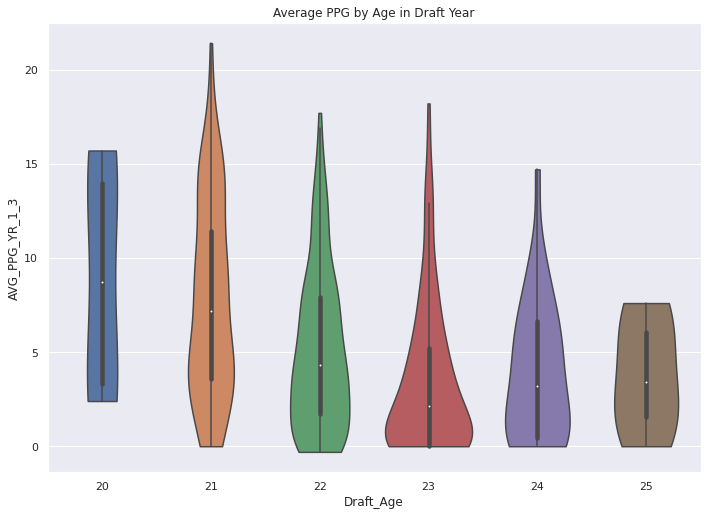

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.violinplot(data=draft_df, x='Draft_Age', y="AVG_PPG_YR_1_3", cut=0).set(title = 'Average PPG by Age in Draft Year')

[Text(0.5, 1.0, 'Average PPG by Early Declare Status')]

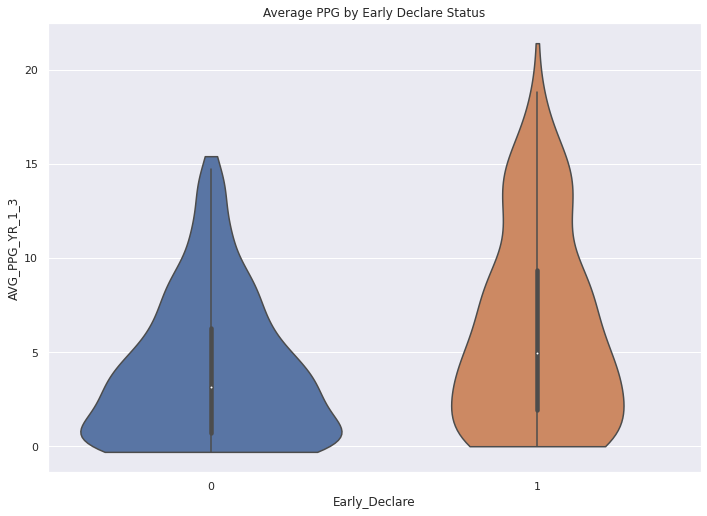

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.violinplot(data=draft_df, x='Early_Declare', y="AVG_PPG_YR_1_3", cut=0).set(title = 'Average PPG by Early Declare Status')

[Text(0.5, 1.0, 'Average PPG by BMI')]

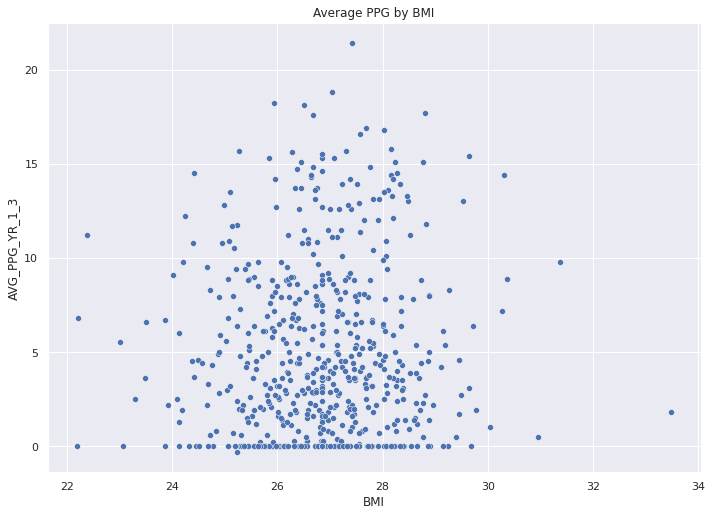

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.scatterplot(data=draft_df, x='BMI', y="AVG_PPG_YR_1_3").set(title = 'Average PPG by BMI')

[Text(0.5, 1.0, 'Average PPG by Combined Receiving Market Share')]

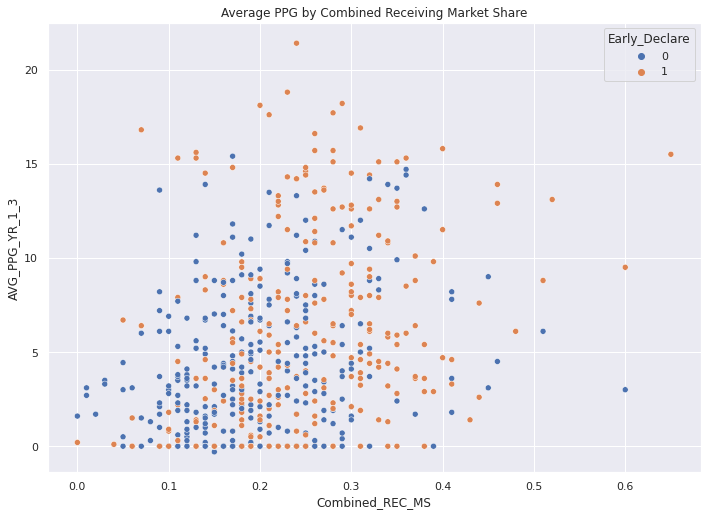

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.scatterplot(data=draft_df, x='Combined_REC_MS', y="AVG_PPG_YR_1_3", hue = 'Early_Declare').set(title = 'Average PPG by Combined Receiving Market Share')

[Text(0.5, 1.0, 'Average PPG by Receiving Yards per Team Pass Attempt')]

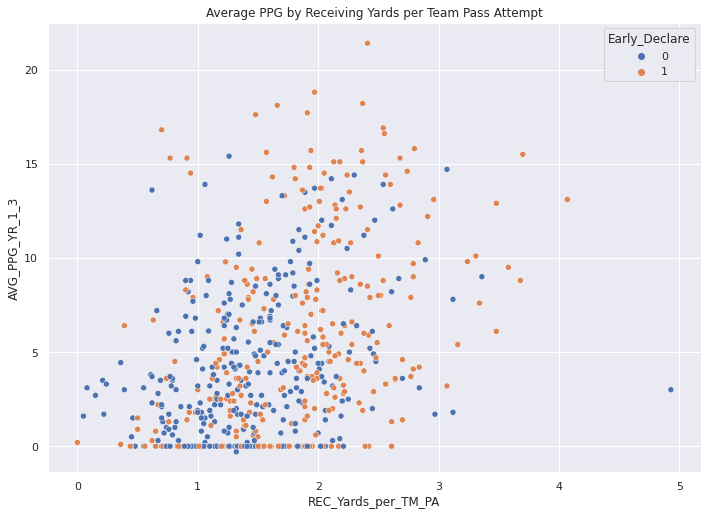

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.scatterplot(data=draft_df, x='REC_Yards_per_TM_PA', y="AVG_PPG_YR_1_3", hue = 'Early_Declare').set(title = 'Average PPG by Receiving Yards per Team Pass Attempt')

[Text(0.5, 1.0, 'Average PPG by College Dominator Rating')]

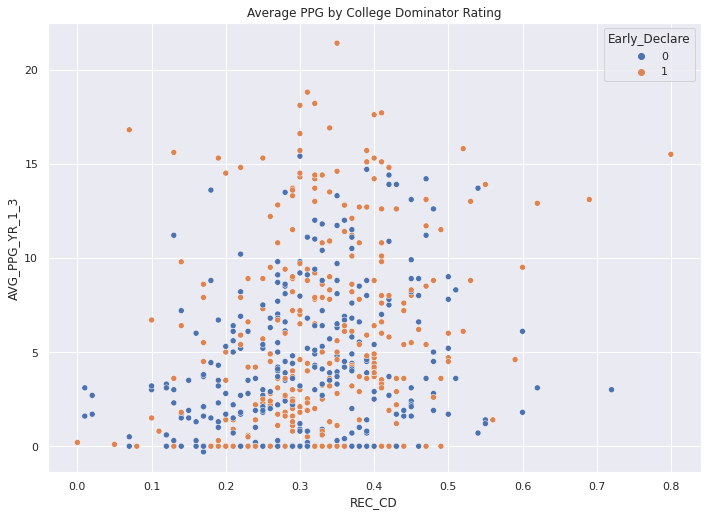

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.scatterplot(data=draft_df, x='REC_CD', y="AVG_PPG_YR_1_3", hue = 'Early_Declare').set(title = 'Average PPG by College Dominator Rating')

[Text(0.5, 1.0, 'Average PPG by Breakout Age 20%')]

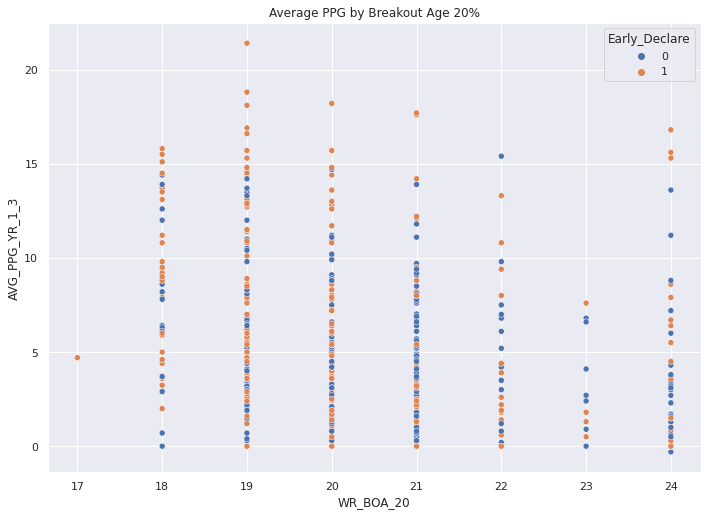

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.scatterplot(data=draft_df, x='WR_BOA_20', y="AVG_PPG_YR_1_3", hue = 'Early_Declare').set(title = 'Average PPG by Breakout Age 20%')

[Text(0.5, 1.0, 'Average PPG by Breakout Age 30%')]

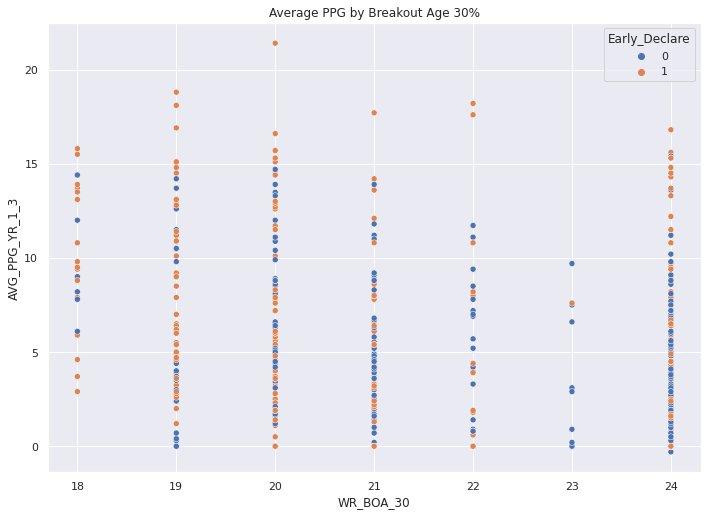

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.scatterplot(data=draft_df, x='WR_BOA_30', y="AVG_PPG_YR_1_3", hue = 'Early_Declare').set(title = 'Average PPG by Breakout Age 30%')

[Text(0.5, 1.0, 'Average PPG by Hand Size')]

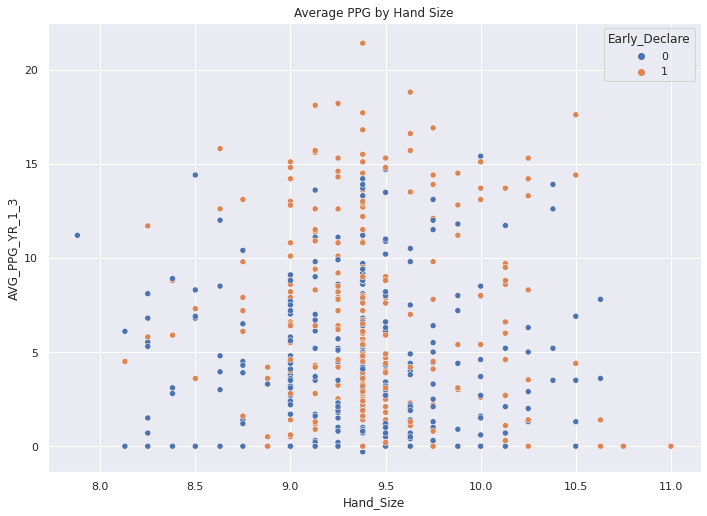

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.scatterplot(data=draft_df, x='Hand_Size', y="AVG_PPG_YR_1_3", hue = 'Early_Declare').set(title = 'Average PPG by Hand Size')

[Text(0.5, 1.0, 'Average PPG by Arm Length')]

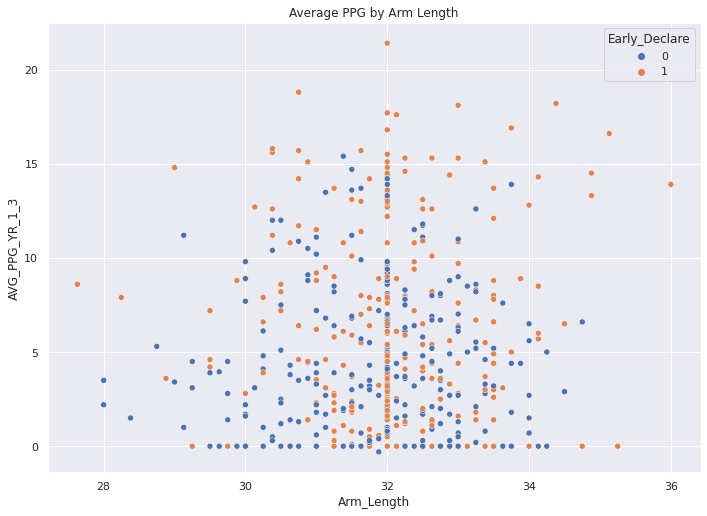

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.scatterplot(data=draft_df, x='Arm_Length', y="AVG_PPG_YR_1_3", hue = 'Early_Declare').set(title = 'Average PPG by Arm Length')

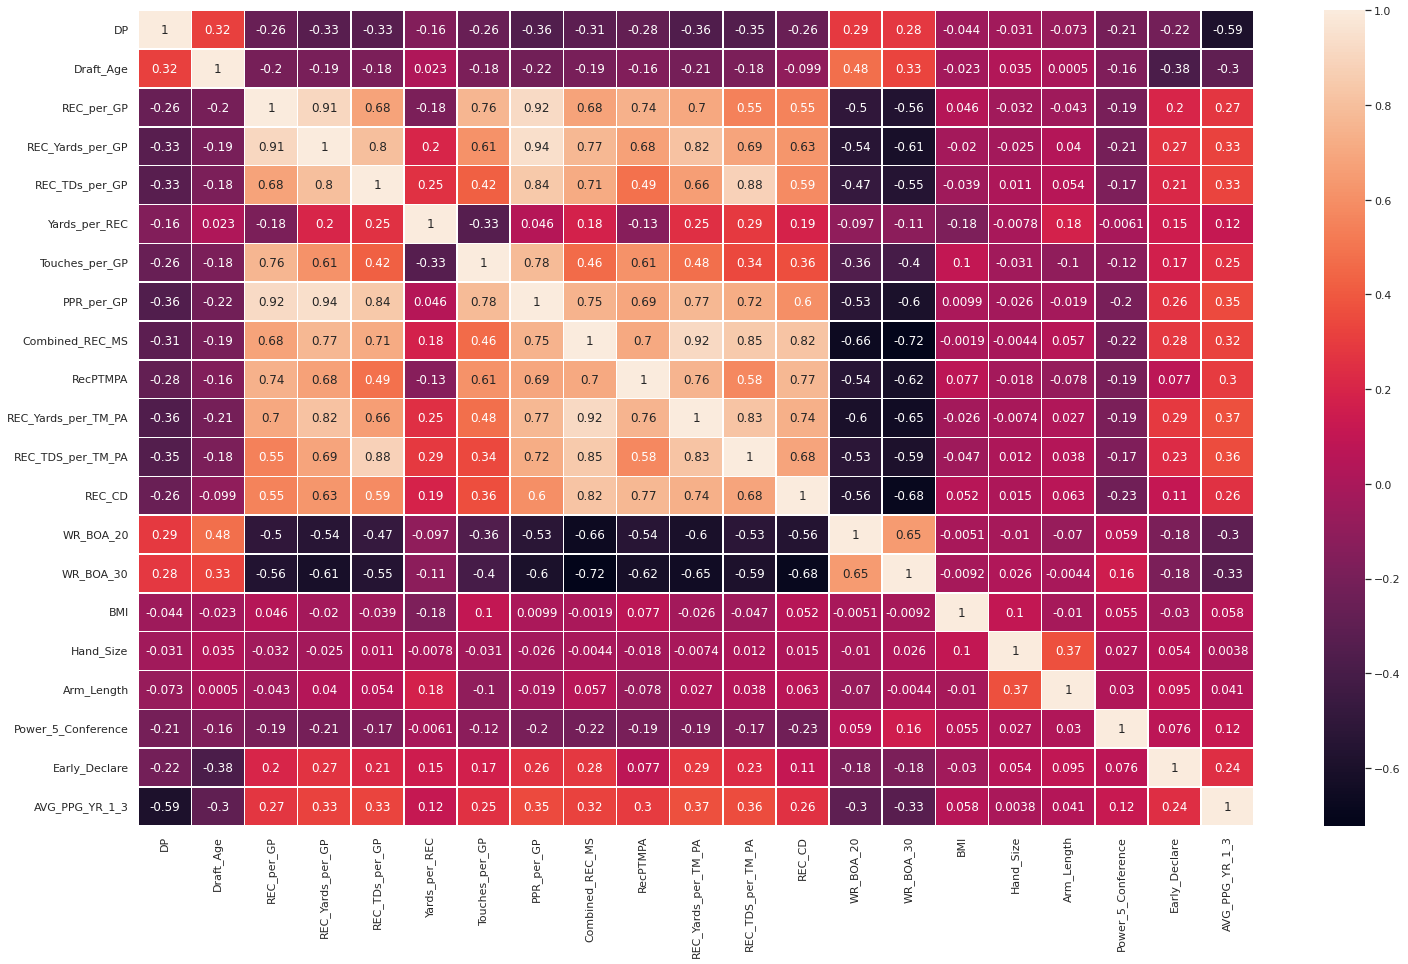

In [ ]:
draft_df_corr_mat = draft_df.drop(['Player','Draft_Year','DR'],axis = 1)
f,ax = plt.subplots(figsize=(25, 15))
corrMatrix = draft_df_corr_mat.corr()
sns.heatmap(corrMatrix, annot=True,linewidths=.5,ax=ax)
plt.show()

##1.0 - EDA Conclusions

Conclusions:


*   Wide receivers drafted earlier in the NFL Draft have greater fantasy success
*   Wide receivers drafted in round 6 or later are not very fantasy relevant. Only one player has averaged at least 10 PPG in their first 3 seasons from rounds 6 and 7
*   Early declares (player who declare they are entering the NFL Draft before their Senior year season) appear to have higher average points per game ceilings
*   No wide receivers with a BMI less than 24 or greater than 30 has averaged 15 points per game or more in their first 3 seasons
*   Average points per game tended to increase with an increase in average receiving yards per team pass attempt
*   Average points per game tended to increase with an increase in college dominator rating
*   Average points per game tended to increase with a younger breakout age
*   Wide receivers with a hand size greater than 8.5 inches have higher average points per game ceilings than wide receivers with hand size less than 8.5 inches
*   Wide receivers with an arm length greater than 30 inches have higher average points per game ceiling than wide receivers with an arm length of less than 30 inches
*   The correlation matrix reveals the predictors with the strongest correlation to average points per game in seasons 1-3 are draft capital, average receiving yards per team pass attempt, early declare status, average points per game in college, and breakout age 30%.


#D - Train/Test Split

In [ ]:
np.random.seed(3)

predictors = draft_df.drop(['AVG_PPG_YR_1_3','Player', 'Draft_Year','DR', 'Draft_Age'],axis = 1)
target = draft_df[['Player','AVG_PPG_YR_1_3']]

#create test/train
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.15)

y_test_player = y_test['Player']
y_train = y_train.drop(['Player'], axis = 1)
y_test = y_test.drop(['Player'], axis = 1)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 854 to 437
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DP                   506 non-null    float64
 1   REC_per_GP           506 non-null    float64
 2   REC_Yards_per_GP     506 non-null    float64
 3   REC_TDs_per_GP       506 non-null    float64
 4   Yards_per_REC        506 non-null    float64
 5   Touches_per_GP       506 non-null    float64
 6   PPR_per_GP           506 non-null    float64
 7   Combined_REC_MS      506 non-null    float64
 8   RecPTMPA             506 non-null    float64
 9   REC_Yards_per_TM_PA  506 non-null    float64
 10  REC_TDS_per_TM_PA    506 non-null    float64
 11  REC_CD               506 non-null    float64
 12  WR_BOA_20            506 non-null    float64
 13  WR_BOA_30            506 non-null    float64
 14  BMI                  506 non-null    float64
 15  Hand_Size            506 non-null    f

In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 854 to 437
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AVG_PPG_YR_1_3  506 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 349 to 761
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DP                   90 non-null     float64
 1   REC_per_GP           90 non-null     float64
 2   REC_Yards_per_GP     90 non-null     float64
 3   REC_TDs_per_GP       90 non-null     float64
 4   Yards_per_REC        90 non-null     float64
 5   Touches_per_GP       90 non-null     float64
 6   PPR_per_GP           90 non-null     float64
 7   Combined_REC_MS      90 non-null     float64
 8   RecPTMPA             90 non-null     float64
 9   REC_Yards_per_TM_PA  90 non-null     float64
 10  REC_TDS_per_TM_PA    90 non-null     float64
 11  REC_CD               90 non-null     float64
 12  WR_BOA_20            90 non-null     float64
 13  WR_BOA_30            90 non-null     float64
 14  BMI                  90 non-null     float64
 15  Hand_Size            90 non-null     fl

In [ ]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 349 to 761
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AVG_PPG_YR_1_3  90 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB


#E - Standardization

##1.0 Density Plots

###1.1 Density Plot of Inputs Before Standardization

Text(0.5, 1.0, 'Train Inputs Density Plot')

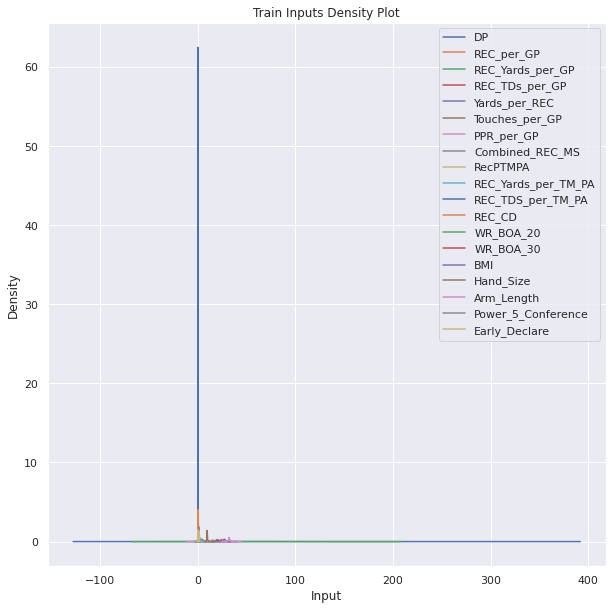

In [ ]:
#density plot of inputs
X_train.plot.density(figsize = (10, 10))#,linewidth = 4)
plt.xlabel("Input")
plt.title("Train Inputs Density Plot")

###1.2 - Density Plot of Inputs Post Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# create scaler
scaler = StandardScaler()

# fit and transform
standard_X_train = scaler.fit_transform(X_train)
standard_X_test = scaler.fit_transform(X_test)

standard_X_train_df = pd.DataFrame(standard_X_train)
standard_X_test_df = pd.DataFrame(standard_X_test)

Text(0.5, 1.0, 'Standardized Train Inputs Density Plot')

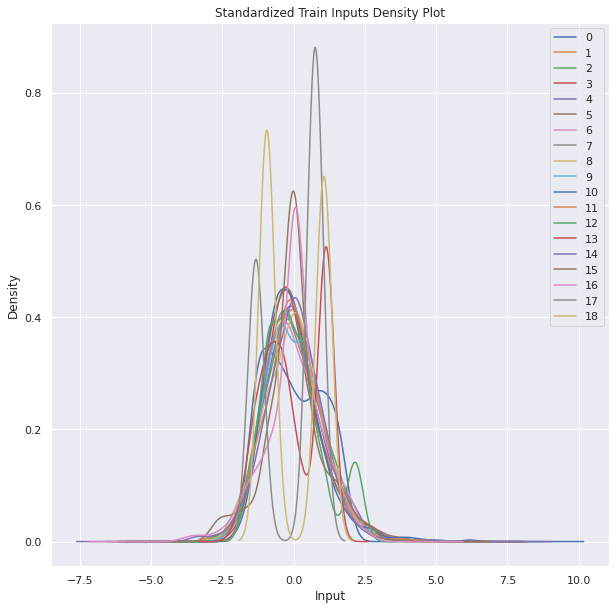

In [ ]:
standard_X_train_df.plot.density(figsize = (10, 10))#,linewidth = 4)
plt.xlabel("Input")
plt.title("Standardized Train Inputs Density Plot")

#F - Modeling

In [ ]:
def rmse(y_pred, y_test):
    return K.sqrt(K.mean(K.square(y_pred - y_test)))

n_inputs = X_train.shape[1]; n_outputs = 1
num_layers_0 = 14; num_layers_1 = 12;
#dropout_rate = 0.1

#create model
nn = Sequential()
nn.add(Dense(num_layers_0, input_dim=n_inputs, activation='relu'))
#model.add(Dense(num_layers_1, activation='relu'))
#nn.add(Dropout(dropout_rate, name="dropout0"))
nn.add(Dense(num_layers_1, activation='relu'))
nn.add(Dense(n_outputs))
nn.compile(loss=rmse, optimizer='adam', metrics=[rmse, 'MAE'])
nn.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 14)                280       
                                                                 
 dense_37 (Dense)            (None, 12)                180       
                                                                 
 dense_38 (Dense)            (None, 1)                 13        
                                                                 
Total params: 473
Trainable params: 473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = nn.fit(standard_X_train, y_train, epochs=500, validation_split = .20, callbacks = [callback])

Epoch 1/500
13/13 [==============================] - 1s 19ms/step - loss: 7.1260 - rmse: 7.1201 - MAE: 5.5657 - val_loss: 7.2617 - val_rmse: 7.8611 - val_MAE: 5.7392
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 6.9272 - rmse: 6.9123 - MAE: 5.2938 - val_loss: 7.0666 - val_rmse: 7.6531 - val_MAE: 5.4936
Epoch 3/500
13/13 [==============================] - 0s 4ms/step - loss: 6.7386 - rmse: 6.7558 - MAE: 5.0735 - val_loss: 6.8877 - val_rmse: 7.4639 - val_MAE: 5.3164
Epoch 4/500
13/13 [==============================] - 0s 6ms/step - loss: 6.5216 - rmse: 6.5298 - MAE: 4.8963 - val_loss: 6.7268 - val_rmse: 7.2945 - val_MAE: 5.1719
Epoch 5/500
13/13 [==============================] - 0s 6ms/step - loss: 6.4509 - rmse: 6.4314 - MAE: 4.7489 - val_loss: 6.5695 - val_rmse: 7.1311 - val_MAE: 5.0320
Epoch 6/500
13/13 [==============================] - 0s 4ms/step - loss: 6.2567 - rmse: 6.2064 - MAE: 4.6104 - val_loss: 6.4075 - val_rmse: 6.9623 - val_MAE: 4.8932
Epoch 7/5

In [ ]:
import matplotlib.pyplot as plt
def plot_metrics(history):
  metrics =  ['loss','MAE']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(1,2,n+1)
    plt.tight_layout()
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend()

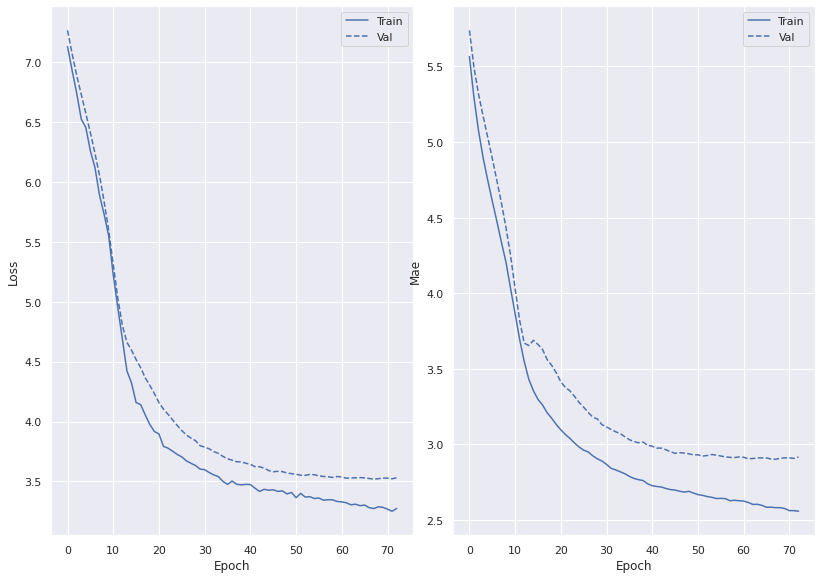

In [ ]:
# Plot the training/validation history of our Keras model
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_metrics(history)

In [ ]:
test_acc = nn.evaluate(standard_X_test, y_test, verbose=1)
print(test_acc)

3/3 [==============================] - 0s 5ms/step - loss: 3.2815 - rmse: 3.2495 - MAE: 2.6033
[3.281517267227173, 3.2494678497314453, 2.603337287902832]


In [ ]:
y_pred = nn.predict(standard_X_test)

df_final = pd.DataFrame()
df_final['player'] = y_test_player
df_final['predicted PPG'] = y_pred
df_final['actual PPG'] = y_test
df_final.sort_values(by=['actual PPG'],ascending=False, inplace = True)

3/3 [==============================] - 0s 4ms/step


In [ ]:
df_final.sort_values(by=['actual PPG'],ascending=False, inplace = True)

df_final.head(60)

,player,predicted PPG,actual PPG
549,AJ Green,10.089267,18.20
154,Justin Jefferson,11.058016,18.10
452,Mike Evans,13.082973,16.60
127,CeeDee Lamb,11.939332,14.60
714,Calvin Johnson,13.207872,13.90
376,Amari Cooper,14.500281,13.10
529,Justin Blackmon,11.388986,12.60
56,Amon-Ra St Brown,6.438743,12.60
580,Randall Cobb,5.518193,11.50
199,Hunter Renfrow,4.005956,11.20


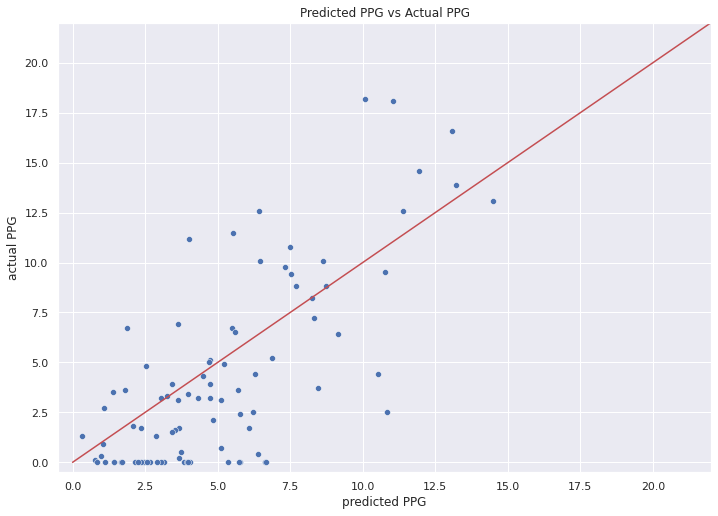

In [ ]:
x = [0, 2.5, 5, 7.5, 10, 12.5, 22]
y = x

fig, ax = plt.subplots()
sns.scatterplot(data=df_final, x='predicted PPG', y="actual PPG").set(title = 'Predicted PPG vs Actual PPG')
ax.set_xlim(-.5,22, 2)
ax.set_ylim(-.5,22, 2)
plt.plot(x, y, color='r')
plt.show()

#G - Cross Validation

In [ ]:
def rmse(y_pred, y_test):
    return K.sqrt(K.mean(K.square(y_pred - y_test)))


n_inputs = X_train.shape[1]; n_outputs = 1
num_layers_0 = 14; num_layers_1 = 12;


callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor

cv_scores = []
def model():
  model = Sequential()
  model.add(Dense(num_layers_0, input_dim=n_inputs, activation='relu'))
  #model.add(Dense(num_layers_1, activation='relu'))
  #model.add(Dropout(dropout_rate, name="dropout0"))
  model.add(Dense(num_layers_1, activation='relu'))
  model.add(Dense(n_outputs))
  model.compile(loss=rmse, optimizer='adam', metrics=[rmse, 'MAE'])
  return model


estimator = KerasRegressor(build_fn=model, epochs=200, verbose=1)#, callback = callback)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, standard_X_train, y_train , cv=kfold, scoring = 'neg_root_mean_squared_error', error_score="raise")
cv_scores.append(results)
print(cv_scores)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean(), results.std()))
print((results.mean(), results.std()))

Epoch 1/200


<ipython-input-126-22467471db48>:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=model, epochs=200, verbose=1)#, callback = callback)


13/13 [==============================] - 1s 2ms/step - loss: 7.2326 - rmse: 7.2206 - MAE: 5.6528
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 7.0872 - rmse: 7.0934 - MAE: 5.4640
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 6.9162 - rmse: 6.9121 - MAE: 5.2913
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 6.7425 - rmse: 6.7319 - MAE: 5.1333
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 6.5432 - rmse: 6.5401 - MAE: 4.9665
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 6.3481 - rmse: 6.3702 - MAE: 4.7758
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 6.0265 - rmse: 5.9846 - MAE: 4.5600
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 5.8219 - rmse: 5.8228 - MAE: 4.3295
Epoch 9/200
13/13 [==============================] - 0s 3ms/step - loss: 5.4893 - rmse: 5.5089 - MAE: 4.0865
Epoch 10/200
13/13 [===========